# 🎓 Chapter 1: Time-Domain Features

## 🧠 What Are Time-Domain Features?

These features are derived directly from the raw audio waveform as a function of time. They are simple yet powerful for tasks like speech detection, beat tracking, and silence removal.


## 🔍 1. Zero Crossing Rate (ZCR)

### 📐 Theory:

The **Zero Crossing Rate (ZCR)** is the rate at which the signal changes sign:

$$NCR=\frac{1}{N-1}\sum_{n=1}^{N-1}{[(x[n].x[n-1]) < 0]}$$

- $x[n]$ = signal sample at time nn

- $N$ = total number of samples

- $1[⋅]$ is an indicator function (1 if true, else 0)

### 🎯 Use Case:

- Detect percussive sounds, unvoiced speec
- Rhythmic information.

## 🔋 2. Energy and RMS

### 📐 Theory:

**Energy:**

$E=\sum_{n=0}^{N-1}{x[n]^2}$

**RMS Energy:**

$RMS=\sqrt{ \frac{1}{N} \sum_{n=0}^{N-1}{x[n]^2} }$

### 🎯 Use Case:
- Loudness estimation
- Detecting voice activity


## 🐍 Pythonic Implementation & Visualization

### 🧰 Required Libraries

In [27]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Loading and Playing Soung

In [28]:
y, sr = librosa.load(librosa.ex('trumpet'), duration=2.0)  # Load a trumpet sample

from IPython.display import Audio

# Play sine wave
Audio(y, rate=sr)

### 🧮 Compute Features

In [29]:
zcr = librosa.feature.zero_crossing_rate(y)[0]
rms = librosa.feature.rms(y=y)[0]

### 📊 Visualization

**i.. Zero Crossing Rate (ZCR) Interpretation:**
- **High ZCR:** Noisy, unvoiced sounds like "s", "f", "sh", cymbals, etc.
- **Low ZCR:** Voiced, tonal sounds like vowels or sustained notes
- **Example:** A region with many quick sign changes (zigzags) in the waveform will have **high ZCR.**


**ii. RMS Interpretation:**
- **Peaks:** Loud regions (shouts, drum hits, instrument attacks)
- **Dips:** Quiet or silent regions
- Often used for **voice activity detection (VAD)**

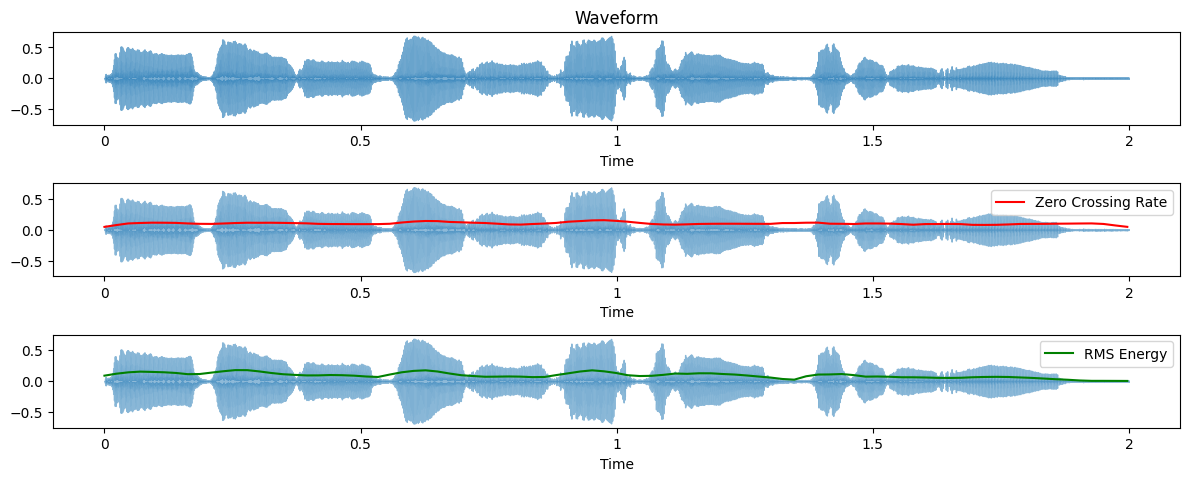

In [30]:
frames = range(len(zcr))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(12, 6))

plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.title('Waveform')

plt.subplot(4, 1, 2)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(t, zcr, label='Zero Crossing Rate', color='r')
plt.legend()

plt.subplot(4, 1, 3)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(t, rms, label='RMS Energy', color='g')
plt.legend()

plt.tight_layout()
plt.show()

## 🔔 3. Envelope Detection

### 📐 Theory:

The **envelope** is the smooth curve that outlines the amplitude of a signal.

A simple way to compute it is by:
- Taking the absolute value of the signal
- Applying a low-pass filter or moving average

$Envelope(n) = \frac{1}{W} \sum_{k=n}^{n+2}|{x[k]}|$

Where WW is the smoothing window size.

### 🎯 Use Case:
- Onset/offset detection
- Speech/music segmentation
- Detecting speech pauses

### 🐍 Python Example



In [31]:
import scipy.signal

# Absolute value
amplitude_envelope = np.abs(y)

# Smooth with low-pass filter
window_size = 1000
envelope_smooth = scipy.signal.convolve(amplitude_envelope,
                                        np.ones(window_size)/window_size, mode='same')

### 📊 Visualization

**Interpretation:**
- Tracks **amplitude contour** over time
- Useful for identifying **onsets** (sudden rises) and **offsets**
- Envelopes are more robust to noise than raw waveform

<Figure size 1000x400 with 0 Axes>

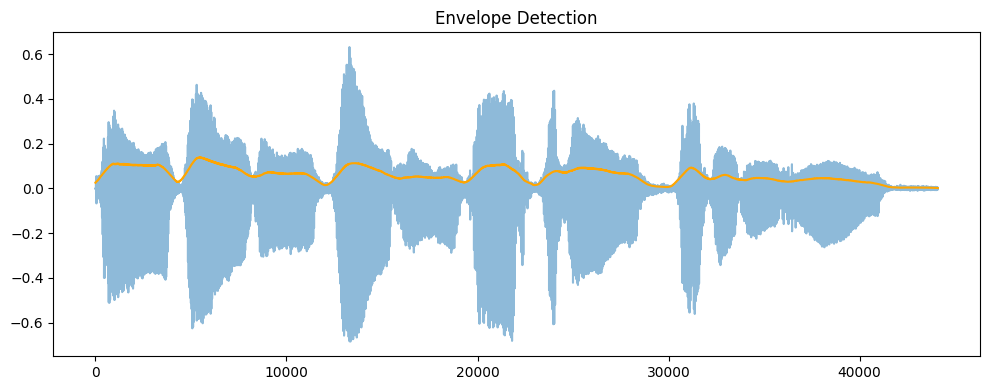

In [32]:
plt.figure(figsize=(10, 4))

plt.figure(figsize=(10, 4))
plt.plot(y, label='Original Signal', alpha=0.5)

plt.plot(envelope_smooth, color='orange', label='Envelope')
plt.title("Envelope Detection")
plt.tight_layout()
plt.show()

## 🎯 4. Temporal Centroid

### 📐 Theory:

Temporal centroid is like a “center of gravity” of the signal’s energy over time.

$$t_c= \frac{ \sum_n{t[n].x[n]} } {\sum_n{x[n]^2}} $$


**Where:**
- $t[n]t[n]$: time of sample n
- $x[n]x[n]$: amplitude at time n

### 🐍 Python Code

In [33]:
times = np.linspace(0, len(y)/sr, len(y))
numerator = np.sum(times * y**2)
denominator = np.sum(y**2)
temporal_centroid = numerator / denominator
print(f"Temporal Centroid: {temporal_centroid:.3f} seconds")

Temporal Centroid: 0.704 seconds


### 📊 Visualization

**Interpretation:**

- If the line is early: signal had energy in the beginning
- If the line is later: signal’s energy occurred after some delay

**Example:**
- A guitar pluck has high energy early → centroid left-shifted.
- A slow vocal swell will have right-shifted centroid.

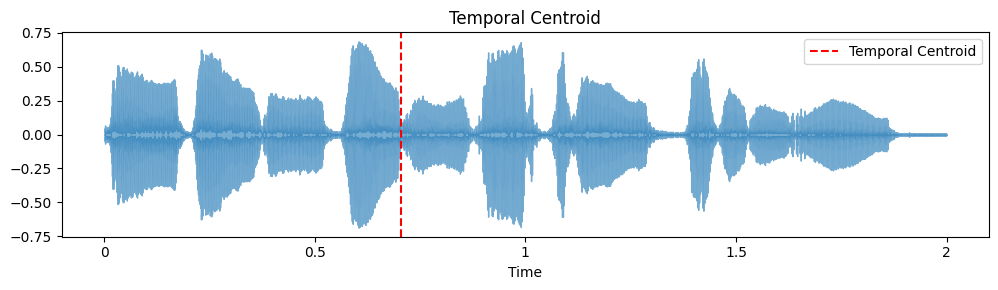

In [34]:
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.axvline(x=temporal_centroid, color='red', linestyle='--', label='Temporal Centroid')
plt.title("Temporal Centroid")
plt.legend()
plt.tight_layout()
plt.show()
